# Project 1: Standardized Test Analysis

## Project Statement

This project aims to examine trends in the participation rates of SAT from 2018 to 2021 and whether COVID-19 had a This project aims to examine trends in the participation rates of SAT from 2018 to 2021 and whether COVID-19 had a significant impact on the participation rates in the peri-COVID-19 era (2020 to 2021).

## Executive Summary

For many years, standardised test scores have been used as a benchmark for college admissions in the USA, where high school students are required to partake in a 3-hour examination based on various knowledge. However, due to the emergence of COVID-19 in [early 2020](https://pubmed.ncbi.nlm.nih.gov/32191675/), several [restrictions](https://blogs.worldbank.org/education/high-stakes-school-exams-during-covid-19-coronavirus-what-best-approach), such as postponment of examination dates, were imposed to restrict the spread of the virus which impacted the participation rates of these standardised test. 

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Other Factors](#Other-Factor(s)-That-Could-Affect-Participation-Rate)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Data Import and Cleaning

#### 1) Clean 2018 to 2020 SAT Scores by State

In [2]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_2020 = pd.read_csv('../data/sat_state_2020.csv')
sat_2021 = pd.read_csv('../data/sat_state_2021.csv')

In [3]:
#checking data
print(sat_2018.info())
print(sat_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   

In [4]:
print(sat_2020.info())
print(sat_2021.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               53 non-null     object 
 1   Participation Rate  51 non-null     object 
 2   EBRW                53 non-null     float64
 3   Math                53 non-null     float64
 4   Total               53 non-null     float64
 5   Unnamed: 5          0 non-null      float64
 6   Unnamed

In [5]:
sat_2021.head(2)

State Participation Rate   EBRW   Math   Total  Unnamed: 5  Unnamed: 6  \
0  Alabama                 3%  591.0  568.0  1159.0         NaN         NaN   
1   Alaska                23%  567.0  553.0  1119.0         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0         NaN         NaN         NaN          NaN          NaN          NaN  
1         NaN         NaN         NaN          NaN          NaN          NaN

In [6]:
#finding extra data since 2019,2020 and 2021 has more tha 51 values (there are 51 states in US)
def find_missing_state(list):
    missing = []
    for s in list:
        if s not in state2018_list:
            missing.append(s)
    return missing

state2019_list= sat_2019['State'].values.tolist()
state2018_list= sat_2018['State'].values.tolist()
state2020_list= sat_2020['State'].values.tolist()
state2021_list= sat_2021['State'].values.tolist()

print(find_missing_state(state2019_list))
print(find_missing_state(state2020_list))
print(find_missing_state(state2021_list))

['Puerto Rico', 'Virgin Islands']
['Puerto Rico', 'Virgin Islands']
['Puerto Rico', 'Virgin Islands, US', nan]


In [7]:
#removing extra states
sat_2019.drop(sat_2019[sat_2019["State"] == 'Puerto Rico'].index, axis = 0, inplace = True)
sat_2019.drop(sat_2019[sat_2019["State"] == 'Virgin Islands'].index, axis = 0, inplace = True)

sat_2020.drop(sat_2020[sat_2020["State"] == 'Puerto Rico'].index, axis = 0, inplace = True)
sat_2021.drop(sat_2021[sat_2021["State"] == 'Puerto Rico'].index, axis = 0, inplace = True)

sat_2020.drop(sat_2020[sat_2020["State"] == 'Virgin Islands'].index, axis = 0, inplace = True)
sat_2021.drop(sat_2021[sat_2021["State"] == 'Virgin Islands'].index, axis = 0, inplace = True)
sat_2021.drop(sat_2021[sat_2021["State"] == 'US'].index, axis = 0, inplace = True)

#removing unnecessary columns and NaN values
sat_2021 = sat_2021.loc[:, :'Total']
sat_2021 = sat_2021.dropna()

#changing 'Participation' from object to float
sat_2018['Participation'] = sat_2018['Participation'].str.rstrip('%').astype('float') / 100.0
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].str.rstrip('%').astype('float') / 100.0
sat_2020['Participation Rate'] = sat_2020['Participation Rate'].str.rstrip('%').astype('float') / 100.0
sat_2021['Participation Rate'] = sat_2021['Participation Rate'].str.rstrip('%').astype('float') / 100.0

#matching the columns in both dataset
sat_2018=sat_2018.rename(columns={'State':'state_name', 
                         'Participation':'2018_participation',
                         'Evidence-Based Reading and Writing':'2018_ebrw',
                        'Math':'2018_math',
                        'Total':'2018_total_score'})

sat_2019=sat_2019.rename(columns={'State':'state_name', 
                         'Participation Rate':'2019_participation',
                         'EBRW':'2019_ebrw',
                        'Math':'2019_math',
                        'Total':'2019_total_score'})

sat_2020=sat_2020.rename(columns={'State':'state_name', 
                         'Participation Rate':'2020_participation',
                         'EBRW':'2020_ebrw',
                        'Math':'2020_math',
                        'Total':'2020_total_score'})

sat_2021=sat_2021.rename(columns={'State':'state_name', 
                         'Participation Rate':'2021_participation',
                         'EBRW':'2021_ebrw',
                        'Math':'2021_math',
                        'Total':'2021_total_score'})

#combining sat datasets
from functools import reduce

df_list = [sat_2018, sat_2019, sat_2020, sat_2021]

sat_df=reduce(lambda  left,right: pd.merge(left,right,on=['state_name'],
                                            how='outer'), df_list)

In [8]:
#checking
print(sat_df.info())
sat_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state_name          51 non-null     object 
 1   2018_participation  51 non-null     float64
 2   2018_ebrw           51 non-null     int64  
 3   2018_math           51 non-null     int64  
 4   2018_total_score    51 non-null     int64  
 5   2019_participation  51 non-null     float64
 6   2019_ebrw           51 non-null     int64  
 7   2019_math           51 non-null     int64  
 8   2019_total_score    51 non-null     int64  
 9   2020_participation  51 non-null     float64
 10  2020_ebrw           51 non-null     int64  
 11  2020_math           51 non-null     int64  
 12  2020_total_score    51 non-null     int64  
 13  2021_participation  51 non-null     float64
 14  2021_ebrw           51 non-null     float64
 15  2021_math           51 non-null     float64
 16  2021_total

state_name  2018_participation  2018_ebrw  2018_math  2018_total_score  \
0     Alabama                0.06        595        571              1166   
1      Alaska                0.43        562        544              1106   
2     Arizona                0.29        577        572              1149   
3    Arkansas                0.05        592        576              1169   
4  California                0.60        540        536              1076   

   2019_participation  2019_ebrw  2019_math  2019_total_score  \
0                0.07        583        560              1143   
1                0.41        556        541              1097   
2                0.31        569        565              1134   
3                0.06        582        559              1141   
4                0.63        534        531              1065   

   2020_participation  2020_ebrw  2020_math  2020_total_score  \
0                0.07        576        551              1127   
1                0.37        555        543              1098   
2                0.29        571        568              1139   
3                0.04        590        567              1157   
4                0.67        527        522              1049   

   2021_participation  2021_ebrw  2021_math  2021_total_score  
0                0.03      591.0      568.0            1159.0  
1                0.23      567.0      553.0            1119.0  
2                0.11      592.0      589.0            1181.0  
3                0.02      610.0      584.0            1194.0  
4                0.24      527.0      530.0            1057.0

In [9]:
#changing 2021 ebrw, math and total data into int
sat_df=sat_df.astype({"2021_ebrw":"int","2021_ebrw":"int", "2021_math":"int", "2021_total_score":"int"})

In [10]:
#adding new column to match US State abbrev
us_abbrv= {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

sat_df['state']=sat_df['state_name'].map(us_abbrv)

sat_df = sat_df[['state_name','state','2018_participation','2018_ebrw','2018_math','2018_total_score','2019_participation','2019_ebrw','2019_math','2019_total_score','2020_participation','2020_ebrw','2020_math','2020_total_score','2021_participation','2021_ebrw','2021_math','2021_total_score']]
sat_df.sort_values(by=['state'], axis=0, ascending=True, inplace=True, ignore_index=True)

#### 2) Clean COVID-19 Cases in US by State Data

In [11]:
covid_cases = pd.read_csv('../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [12]:
#checking data
print(covid_cases.info())
covid_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57600 entries, 0 to 57599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  57600 non-null  object
 1   state            57600 non-null  object
 2   tot_cases        57600 non-null  object
 3   conf_cases       32430 non-null  object
 4   prob_cases       32358 non-null  object
 5   new_case         57600 non-null  object
 6   pnew_case        53987 non-null  object
 7   tot_death        57600 non-null  object
 8   conf_death       31751 non-null  object
 9   prob_death       31751 non-null  object
 10  new_death        57600 non-null  object
 11  pnew_death       54019 non-null  object
 12  created_at       57600 non-null  object
 13  consent_cases    47995 non-null  object
 14  consent_deaths   48960 non-null  object
dtypes: object(15)
memory usage: 6.6+ MB
None


submission_date state tot_cases conf_cases prob_cases new_case pnew_case  \
0      03/11/2021    KS   297,229    241,035     56,194        0         0   
1      12/01/2021    ND   163,565    135,705     27,860      589       220   
2      02/12/2021    UT   359,641    359,641          0    1,060         0   
3      02/04/2020    AR         0        NaN        NaN        0       NaN   
4      05/30/2022    AK   251,425        NaN        NaN        0         0   

  tot_death conf_death prob_death new_death pnew_death  \
0     4,851        NaN        NaN         0          0   
1     1,907        NaN        NaN         9          0   
2     1,785      1,729         56        11          2   
3         0        NaN        NaN         0        NaN   
4     1,252        NaN        NaN         0          0   

               created_at consent_cases consent_deaths  
0  03/12/2021 03:20:13 PM         Agree            NaN  
1  12/02/2021 02:35:20 PM         Agree      Not agree  
2  02/13/2021 02:50:08 PM         Agree          Agree  
3  03/26/2020 04:22:39 PM     Not agree      Not agree  
4  05/31/2022 01:20:20 PM           NaN            NaN

In [13]:
#changing date format 
covid_cases['submission_date']=pd.to_datetime(covid_cases['submission_date'])

In [14]:
#Getting 2020 to 2021 covid cases
target_covid_cases = covid_cases[(covid_cases['submission_date'] > "2020-01-01") & (covid_cases['submission_date'] < "2022-01-01")]

target_covid_cases.sort_values(['state', 'submission_date'], ascending = [True, True],inplace=True)
target_covid_cases=target_covid_cases.reset_index(drop=True) 

#change tot_cases values to int 
target_covid_cases['tot_cases']=target_covid_cases['tot_cases'].str.replace(',', '').astype('int')

/var/folders/x1/jfl0w90d1wg_r308c5c731bw0000gn/T/ipykernel_1354/195352818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_covid_cases.sort_values(['state', 'submission_date'], ascending = [True, True],inplace=True)


In [15]:
#checking
target_covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42600 entries, 0 to 42599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  42600 non-null  datetime64[ns]
 1   state            42600 non-null  object        
 2   tot_cases        42600 non-null  int64         
 3   conf_cases       23180 non-null  object        
 4   prob_cases       23108 non-null  object        
 5   new_case         42600 non-null  object        
 6   pnew_case        38987 non-null  object        
 7   tot_death        42600 non-null  object        
 8   conf_death       23001 non-null  object        
 9   prob_death       23001 non-null  object        
 10  new_death        42600 non-null  object        
 11  pnew_death       39019 non-null  object        
 12  created_at       42600 non-null  object        
 13  consent_cases    35495 non-null  object        
 14  consent_deaths   36210 non-null  objec

In [16]:
#splitting covid data into 2020 and 2021 as the cases are the sum of reported cases upon submission 
total_cases_2020 = target_covid_cases.loc[target_covid_cases['submission_date'] == '2020-12-31']
print(total_cases_2020.shape)

total_cases_2021=target_covid_cases.loc[target_covid_cases['submission_date'] == '2021-12-31']
print(total_cases_2021.shape)

(60, 15)
(60, 15)


In [17]:
#There are 60 states in the total-cases dataframe. Identifying the states not in the 51 state list under study
def check_excess_state(df):
    excess=[]
    for abv in df['state'].values.tolist():
        if abv not in sat_df['state'].values.tolist():
            excess.append(abv)
    return excess

excess_2020 = check_excess_state(total_cases_2020)
excess_2021 = check_excess_state(total_cases_2021)

#Consolidating dataframe to include only the 51 US state
total_cases_2020=total_cases_2020[~total_cases_2020['state'].isin(excess_2020)]
total_cases_2020=total_cases_2020.reset_index(drop=True) 
total_cases_2020=total_cases_2020[['submission_date','state','tot_cases']]
print(total_cases_2020.shape)

total_cases_2021=total_cases_2021[~total_cases_2021['state'].isin(excess_2021)]
total_cases_2021=total_cases_2021.reset_index(drop=True)
total_cases_2021=total_cases_2021[['submission_date','state','tot_cases']]
print(total_cases_2021.shape)

(51, 3)
(51, 3)


In [18]:
#Combining the COVID-19 dataframe into one
total_cases_2020.rename({'submission_date':'2020_submission_date','tot_cases':'2020_tot_cases'},axis=1,inplace=True)
total_cases_2021.rename({'submission_date':'2021_submission_date','tot_cases':'2021_tot_cases'},axis=1,inplace=True)

total_cases=pd.merge(total_cases_2020, total_cases_2021, on="state", how='left')
total_cases=total_cases[['state','2020_tot_cases','2021_tot_cases']]
total_cases['2021_tot_cases']= total_cases['2021_tot_cases'] - total_cases['2020_tot_cases']

new_column = sat_df[['state_name']]
total_cases=pd.concat([new_column , total_cases], axis=1)

#### 3) Clean US School Admission Data

In [19]:
test_req_df = pd.read_csv('../data/sat_act_by_college.csv')

In [20]:
test_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


In [21]:
#checking variables
print(test_req_df['Test Optional?'].unique())
print(test_req_df['Applies to Class Year(s)'].unique())

['Yes' 'Yes (TB)' 'Yes*' 'Yes (TF)' 'No']
['2021' '2021 2022' 'All / Permanent Policy' '2021 2022 2023 2024'
 '2021 2022 2023' '2021 2022 2023 2024 2025' nan]


In [22]:
#changing to boolean values for easier identification of schools that made test optional
test_req_df = test_req_df.replace({'Test Optional?': {'Yes': 1, 'Yes (TB)': 1, 'Yes*':1, 'Yes (TF)':1,
                                'No': 0}})

#changing 'Accept Rate' to float type
test_req_df['Accept Rate']=test_req_df['Accept Rate'].str.rstrip('%').astype('float') / 100.0

#dropping potentially unused column
test_req_df.drop(columns= 'ACT Total 25th-75th Percentile', inplace = True)

In [23]:
test_req_df.head()

School  Test Optional? Applies to Class Year(s)  \
0   Stanford University               1                     2021   
1       Harvard College               1                     2021   
2  Princeton University               1                     2021   
3   Columbia University               1                     2021   
4       Yale University               1                     2021   

                                      Policy Details  Number of Applicants  \
0  Stanford has adopted a one-year test optional ...                 47452   
1  Harvard has adopted a one-year test optional p...                 42749   
2  Princeton has adopted a one-year test optional...                 35370   
3  Columbia has adopted a one-year test optional ...                 40203   
4  Yale has adopted a one-year test optional poli...                 36844   

   Accept Rate SAT Total 25th-75th Percentile  
0        0.043                      1440-1570  
1        0.047                      1460-1580  
2        0.055                      1440-1570  
3        0.055                      1450-1560  
4        0.061                      1460-1570

In [24]:
#since Nan values refer to those schools that have made test requirement as compulsory, changing Nan values to match
test_req_df.fillna('compulsory', inplace=True)

#create new column to specifically study 2021 test requirement 
test_req_df['optional_2021']=['yes' if '2021' in year else 'permanent' if 'All / Permanent Policy' in year else 'nil' for year in test_req_df['Applies to Class Year(s)']]

In [25]:
#cleaning columns
test_req_df=test_req_df.rename(columns={'School':'school', 
                         'Test Optional?':'test_optional',
                         'Applies to Class Year(s)': 'applies_class_year',
                        'Policy Details':'policy_detail',
                        'Number of Applicants':'no_applicants',
                        'Accept Rate': 'accept_rate',
                        'SAT Total 25th-75th Percentile': 'sat_25th_75th_percentile',
                         'optional_2021': 'optional_in_2021'
                           }
                  )
#re-ordering and dropping potentially non-used columns
test_req_df=test_req_df[['school','test_optional','optional_in_2021','applies_class_year']]

In [26]:
#checking
test_req_df.head(2)

school  test_optional optional_in_2021 applies_class_year
0  Stanford University              1              yes               2021
1      Harvard College              1              yes               2021

#### 4) Clean Absolute SAT Participation Rate Data

In [27]:
#Using absolute values to calculate national participation rate
sat_par_abs = pd.read_csv('../data/participation rate by state - absolute.csv')

#changing column names to match feature in data dictionary 
sat_par_abs['state_abbrev']=sat_par_abs['states'].map(us_abbrv)
sat_par_abs.rename(columns={'states':'state_name', 'state_abbrev':'state'}, inplace=True)

#Reordering columns
sat_par_abs=sat_par_abs[['state_name','state','test_takers_2021','num_grads_2021','test_takers_2020','num_grads_2020','test_takers_2019','num_grads_2019']]

In [28]:
#checking
sat_par_abs.head()

state_name state  test_takers_2021  num_grads_2021  test_takers_2020  \
0     Alabama    AL              1706           51670              3201   
1      Alaska    AK              1842            8010              2822   
2     Arizona    AZ              9010           79200             19634   
3  California    CA            116394          491830            284631   
4    Colorado    CO             34952           62970             59781   

   num_grads_2020  test_takers_2019  num_grads_2019  
0           47132              3240           48690  
1            7531              3212            7758  
2           68574             21472           68985  
3          427665            272892          431009  
4           59020             59494           58611

---

## Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state_name|object|sat_df, total_cases, sat_par_abs|Name of the state in the US from which data was collected|
|state|object|sat_df, total_cases, sat_par_abs|Abbreviation of USA State|
|20xx_participation|float|sat_df|State's eligible population's participation in taking the SAT for indicated year |
|20xx_ebrw|integer|sat_df|State's average grade on the Evidence-Based Reading and Writing section of the SAT for indicated year  (Between 200-800)|
|20xx_math|integer|sat_df|State's average grade on the Math section of the SAT for indicated year  (Between 200-800)
|20xx_total_score|integer|sat_df|State's average total grade on the SAT for the indicated year (Between 400-1600)|
|submission_date|datetime|total_cases|Date of submission of COVID-19 cases|
|20xx_tot_cases|integer|total_cases|Total number of COVID-19 cases for the indicated year|
|school|object|test_req_df|Name of College/University|
|test_optional|boolean|test_req_df|Admission requirement for SAT/ACT|
|optional_in_2021|object|test_req_df|Shows if school allows SAT/ACT to be optional for admission to class of 2021|
|applies_class_year|object|test_req_df|Year of admission in which SAT is optional|
|test_takers_20xx|integer|sat_par_abs|Number of students taking SAT for the indicated year|
|num_grads_20xx|integer|sat_par_abs|Number of graduating students taking SAT for the indicated year|


---

## Exploratory Data Analysis 

### Summary Statistics

In [29]:
sat_df.describe().T

count         mean        std     min       25%      50%  \
2018_participation   51.0     0.457451   0.373143    0.02     0.045     0.52   
2018_ebrw            51.0   563.686275  47.502627  480.00   534.500   552.00   
2018_math            51.0   556.235294  47.772623  480.00   522.500   544.00   
2018_total_score     51.0  1120.019608  94.155083  977.00  1057.500  1098.00   
2019_participation   51.0     0.490588   0.387476    0.02     0.055     0.54   
2019_ebrw            51.0   560.803922  46.248035  483.00   527.500   550.00   
2019_math            51.0   552.196078  51.290553  460.00   511.500   546.00   
2019_total_score     51.0  1113.078431  97.197910  943.00  1038.000  1097.00   
2020_participation   51.0     0.487059   0.389262    0.02     0.045     0.51   
2020_ebrw            51.0   554.901961  42.780488  480.00   523.000   549.00   
2020_math            51.0   545.549020  46.898321  456.00   505.000   543.00   
2020_total_score     51.0  1100.352941  89.244344  936.00  1027.500  1095.00   
2021_participation   51.0     0.310392   0.289551    0.01     0.030     0.26   
2021_ebrw            51.0   566.666667  42.109698  499.00   528.000   566.00   
2021_math            51.0   556.058824  46.483723  480.00   524.500   554.00   
2021_total_score     51.0  1122.294118  87.523550  984.00  1052.500  1123.00   

                         75%      max  
2018_participation     0.775     1.00  
2018_ebrw            610.500   643.00  
2018_math            593.500   655.00  
2018_total_score    1204.000  1298.00  
2019_participation     0.820     1.00  
2019_ebrw            612.000   636.00  
2019_math            599.000   648.00  
2019_total_score    1210.000  1284.00  
2020_participation     0.850     1.00  
2020_ebrw            599.500   624.00  
2020_math            586.000   633.00  
2020_total_score    1185.500  1257.00  
2021_participation     0.480     0.96  
2021_ebrw            607.000   631.00  
2021_math            600.000   636.00  
2021_total_score    1204.500  1263.00

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [30]:
def stdev(data):
    mean = sum(data)/len(data)
    deviations = [(x-mean)**2 for x in data]
    variance = sum(deviations)/len(data)
    return variance**0.5

In [31]:
sd = {x: stdev(sat_df[x]) for x in sat_df.columns if sat_df[x].dtypes!=object}
sd

{'2018_participation': 0.3694661922353942,
 '2018_ebrw': 47.03460978357609,
 '2018_math': 47.30194550378352,
 '2018_total_score': 93.22742384464433,
 '2019_participation': 0.3836584048685726,
 '2019_ebrw': 45.79237868254512,
 '2019_math': 50.78521461840036,
 '2019_total_score': 96.24027185617864,
 '2020_participation': 0.3854271585903205,
 '2020_ebrw': 42.35899557306862,
 '2020_math': 46.43625769213747,
 '2020_total_score': 88.36506796493464,
 '2021_participation': 0.2866983164309961,
 '2021_ebrw': 41.694814022128334,
 '2021_math': 46.02574376163839,
 '2021_total_score': 86.66122775942233}

In [32]:
# Checking numpy's std method
{x: np.std(sat_df[x]) for x in sat_df.columns if sat_df[x].dtypes!=object}

{'2018_participation': 0.3694661922353941,
 '2018_ebrw': 47.03460978357609,
 '2018_math': 47.30194550378353,
 '2018_total_score': 93.22742384464432,
 '2019_participation': 0.3836584048685726,
 '2019_ebrw': 45.79237868254512,
 '2019_math': 50.78521461840037,
 '2019_total_score': 96.24027185617865,
 '2020_participation': 0.3854271585903205,
 '2020_ebrw': 42.35899557306861,
 '2020_math': 46.43625769213747,
 '2020_total_score': 88.36506796493465,
 '2021_participation': 0.2866983164309961,
 '2021_ebrw': 41.694814022128334,
 '2021_math': 46.025743761638395,
 '2021_total_score': 86.66122775942235}

The manual calculation and numpy std method return the same values while pandas returns slightly different values for standard deviation. This is due to pandas using the unbiased estimator (`n-1` instead of `n` in the denominator), which is better for estimating standard deviation of a sample. 

### Investigating Trends in the Data

#### Trends in States with Low and High Participation Rates from 2018 to 2019

In [33]:
# Writing function to give top 5 and bottom 5 (to sort values by a column, specified column must be placed index 2 position)
def top_and_btm(col, df, num):
    return df[col].sort_values(by=col[2], ascending=False).iloc[np.r_[0:num, -num:0]]

In [34]:
# States with the highest and lowest average total scores for SATs in 2018, together with their participation rates
top_and_btm(['state_name','state','2018_participation', '2018_total_score'],sat_df, 5)

state_name state  2018_participation  2018_total_score
22      Michigan    MI                1.00              1011
5       Colorado    CO                1.00              1025
8       Delaware    DE                1.00               998
6    Connecticut    CT                1.00              1053
13         Idaho    ID                1.00              1001
41  South Dakota    SD                0.03              1240
29      Nebraska    NE                0.03              1252
12          Iowa    IA                0.03              1265
50       Wyoming    WY                0.03              1257
28  North Dakota    ND                0.02              1283

In [35]:
# States with the highest and lowest average total scores for SATs in 2019, together with their participation rates
top_and_btm(['state_name','state', '2019_participation', '2019_total_score', ],sat_df, 5)

state_name state  2019_participation  2019_total_score
22      Michigan    MI                1.00              1003
6    Connecticut    CT                1.00              1046
39  Rhode Island    RI                1.00               995
13         Idaho    ID                1.00               993
9        Florida    FL                1.00               999
41  South Dakota    SD                0.03              1268
29      Nebraska    NE                0.03              1260
12          Iowa    IA                0.03              1244
50       Wyoming    WY                0.03              1238
28  North Dakota    ND                0.02              1263

In [36]:
# States with the highest and lowest average total scores for SATs in 2020, together with their participation rates
top_and_btm(['state_name','state', '2020_participation','2020_total_score', ],sat_df, 5)

state_name state  2020_participation  2020_total_score
22              Michigan    MI                1.00               998
39          Rhode Island    RI                1.00               990
5               Colorado    CO                1.00              1012
6            Connecticut    CT                1.00              1039
7   District of Columbia    DC                1.00               979
41          South Dakota    SD                0.03              1218
29              Nebraska    NE                0.03              1229
12                  Iowa    IA                0.03              1220
28          North Dakota    ND                0.02              1231
50               Wyoming    WY                0.02              1220

In [37]:
# States with the highest and lowest average total scores for SATs in 2021, together with their participation rates
top_and_btm(['state_name','state', '2021_participation','2021_total_score', ],sat_df, 5)

state_name state  2021_participation  2021_total_score
8               Delaware    DE                0.96               984
13                 Idaho    ID                0.90               985
7   District of Columbia    DC                0.90               987
9                Florida    FL                0.81               993
14              Illinois    IL                0.80              1007
41          South Dakota    SD                0.01              1215
28          North Dakota    ND                0.01              1258
44                  Utah    UT                0.01              1238
48             Wisconsin    WI                0.01              1215
25           Mississippi    MS                0.01              1202

#### Observations

South Dakota, North Dakota, Nebraska, Wyoming and Iowa have maintained the lowest 5 states of SAT participation rates from 2018-2020, but only South and North Dakota continued their placement in 2021.

Interestingly, the top 5 states with highest participation rate from 2018 to 2020 are states with 100% of the high school students for the respective cohorts. Michigan, Connecticut and Rhode Island were the 3 states to feature in the top 5 for all 3 years. 
However, in 2021, there were no states with full participation rate, with none of the 3 states mentioned featuring in the top 5.


#### 2) Trends in COVID-19 Cases from 2020 to 2021

In [38]:
# States with highest and lowest total number of cases in 2020
top_and_btm(['state_name','state', '2020_tot_cases'],total_cases, 5)

state_name state  2020_tot_cases
4             California    CA         2231552
43                 Texas    TX         1756172
9                Florida    FL         1317531
14              Illinois    IL          963389
35                  Ohio    OH          700380
30         New Hampshire    NH           44028
7   District of Columbia    DC           28983
21                 Maine    ME           25924
11                Hawaii    HI           21026
46               Vermont    VT            6970

In [39]:
# States with highest and lowest total number of cases in 2021
top_and_btm(['state_name','state', '2021_tot_cases'],total_cases, 5)

state_name state  2021_tot_cases
4             California    CA         3245977
9                Florida    FL         2932131
43                 Texas    TX         2820627
38          Pennsylvania    PA         1387855
34              New York    NY         1376452
28          North Dakota    ND           81856
41          South Dakota    SD           80040
50               Wyoming    WY           71229
7   District of Columbia    DC           65303
46               Vermont    VT           53818

In [40]:
# States with highest and lowest increased rate of participation in 2021 (to compare with COVID-19 data later)

##creating new column for difference in cases between 2021 and 2020
participation_2020_2021 =sat_df[['state_name','state','2020_participation','2021_participation']]
participation_2020_2021['difference_2020_2021']= participation_2020_2021['2020_participation'] - participation_2020_2021['2021_participation']

top_and_btm(['state_name','state', 'difference_2020_2021'],participation_2020_2021, 5)

/var/folders/x1/jfl0w90d1wg_r308c5c731bw0000gn/T/ipykernel_1354/184686748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participation_2020_2021['difference_2020_2021']= participation_2020_2021['2020_participation'] - participation_2020_2021['2021_participation']


state_name state  difference_2020_2021
21          Maine    ME                  0.69
49  West Virginia    WV                  0.53
19  Massachusetts    MA                  0.46
5        Colorado    CO                  0.44
4      California    CA                  0.43
29       Nebraska    NE                  0.01
12           Iowa    IA                  0.01
17       Kentucky    KY                  0.00
50        Wyoming    WY                  0.00
32     New Mexico    NM                 -0.11

#### Observations
California, Florida and Texas are observed to have maintained in the top 3 states with highest report COVID-19 cases in both 2020 and 2021.
Meanwhile, Vermont and District of Columbia are the only 2 states that have been ranked in the lowest number of COVID-19 cases. 

As for the states with the most consistently high SAT participation in 2021, Wyoming, Kentucky, Iowa and Nebraska saw little to no difference in their participation rates in 2021, despite COVID-19 cases and the snowball effects (to be discussed more later).
Maine and West Virginia both saw a 50% difference in participation rates, with Massachusetts, Colorado and California following suite.

---

## Data Visualization

### Trends Seen in SAT Participation and Average State Score from 2018 to 2021

/var/folders/x1/jfl0w90d1wg_r308c5c731bw0000gn/T/ipykernel_1354/478119446.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlations of 2018 to 2021 SAT Participation Rates and Scores')

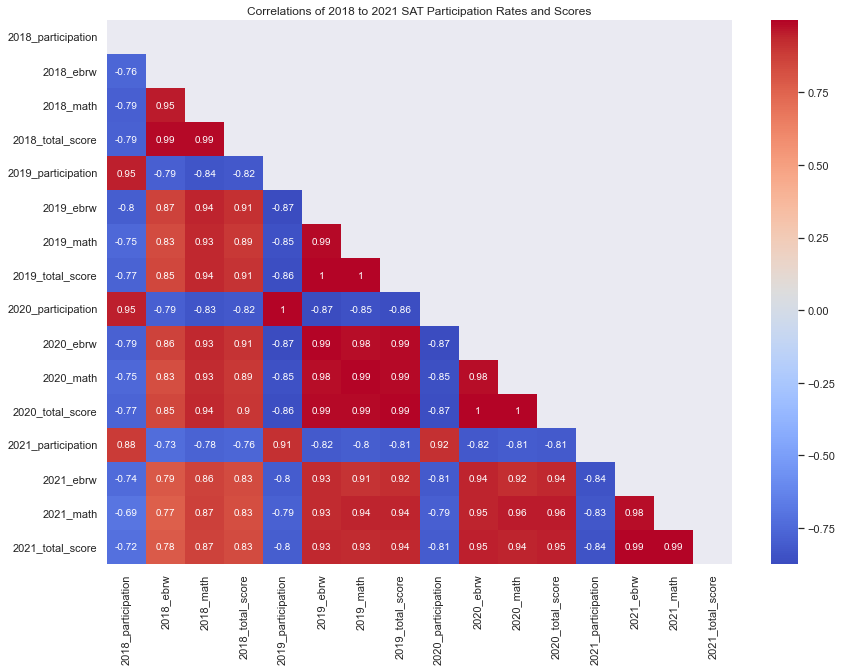

In [41]:
#makign heatmap to visualise correlation in sat_df 
sns.set_theme()

plt.figure(figsize=(14,10))
corr = sat_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
sns.heatmap(sat_df.corr(), annot=True, mask=mask, cmap='coolwarm')
ax.set_title('Correlations of 2018 to 2021 SAT Participation Rates and Scores')

The heatmap shows that the SAT participation rates are inversely related to their average total scores (highlighted by the strong negative correlation). Conversely, there are strong positive correlations for the subject scores between years, which suggest that there were no major fluctuations to the individual subject averages across the years.

In [42]:
#making function to plot multiple histogram in one figure
def subplot_histogram(df, list_of_x, list_of_xlabels, list_of_ylabels, c):
    nrows = int(np.ceil(len(list_of_x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,9))  
    ax = ax.ravel() 
    for i, x in enumerate(list_of_x): 
        ax[i].hist(df[x], color=c)
        ax[i].set_title(f'Histogram of {x.replace("_", " ").title()} \n Mean = {round(df[list_of_x[i]].mean(), 2)}', fontsize=16)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=14)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=14)
        ax[i].axvline(df[x].mean(), c='r', ls='dotted')
        ax[i].grid(False)
        fig.tight_layout()

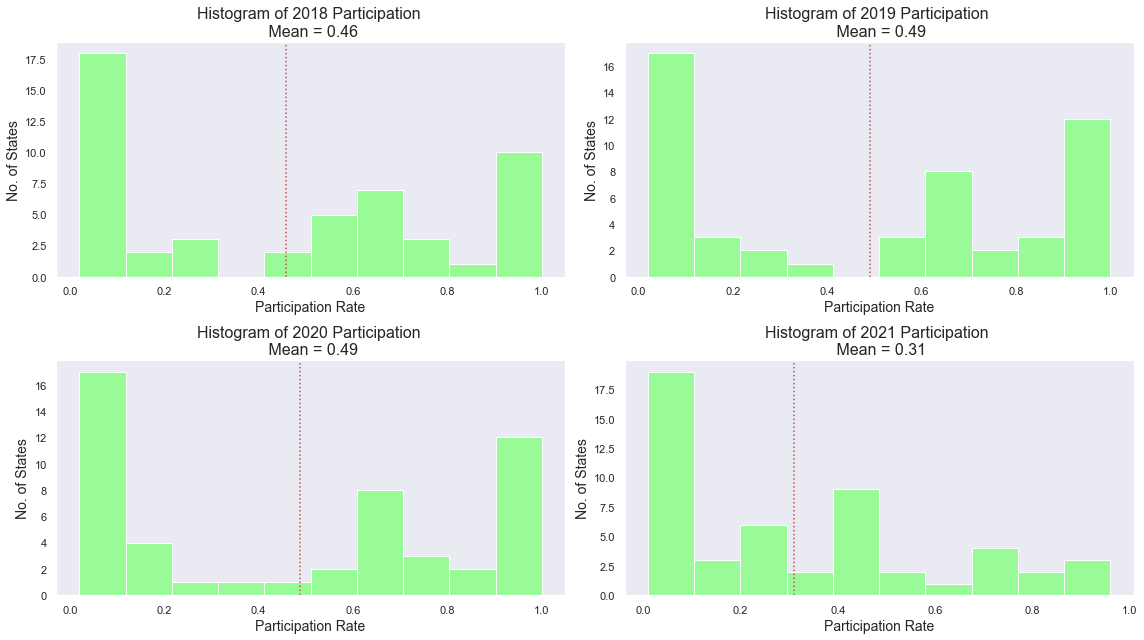

In [43]:
x_columns = ['2018_participation', '2019_participation', '2020_participation', '2021_participation']
xlabels = ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']
ylabels = ['No. of States', 'No. of States', 'No. of States', 'No. of States']
subplot_histogram(df=sat_df, list_of_x=x_columns, list_of_xlabels=xlabels, list_of_ylabels=ylabels, c='palegreen')

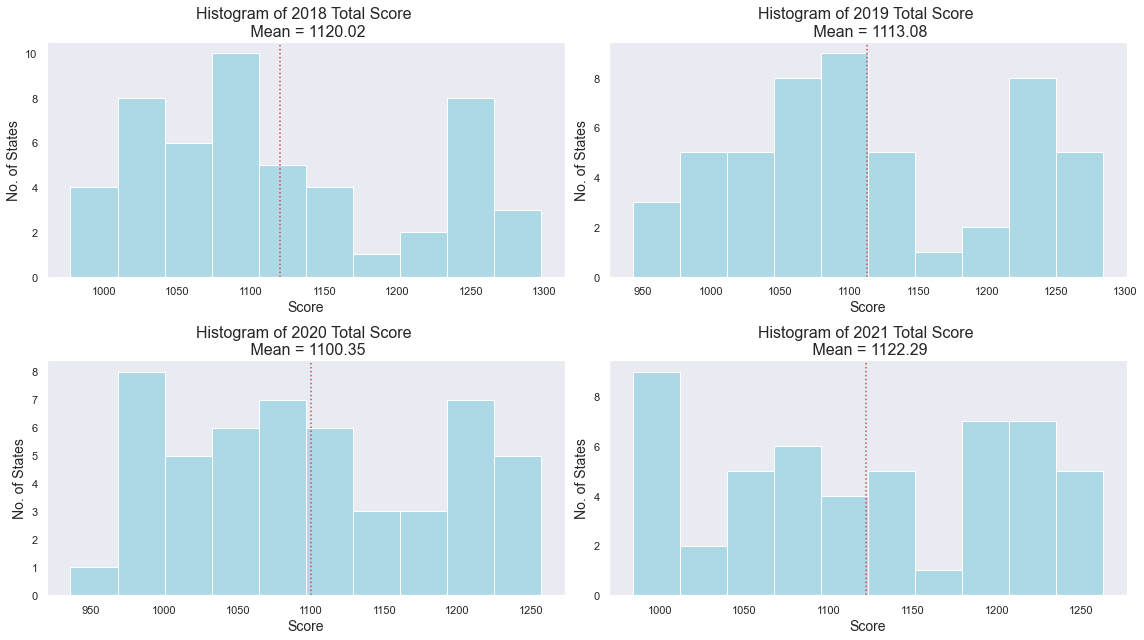

In [44]:
columns = ['2018_total_score', '2019_total_score', '2020_total_score', '2021_total_score']
xlabels = ['Score', 'Score', 'Score', 'Score']
ylabels = ['No. of States', 'No. of States', 'No. of States', 'No. of States']
subplot_histogram(sat_df, columns, xlabels, ylabels,'lightblue')

#### Histogram Observations

From the participation rates observation, the mean participation rates for SAT across the years increased from 0.46 to 0.49, but a sharp drop to 0.31 in 2021. This suggests that high school students across the states do see the importance of participating in the SATs for college admission but an occurrence resulted in a drastic drop in that notion in 2021.The distributions for the participation models are approximately bimodal, which indicates that the states usually have either a high or low participation rate. 

As for the average total scores, most states fall between the 1000-1100 scores and 1200-1300 score range, which also shows bimodal tendencies. As such, two peaks are seen forming.

However, 2021 shows a different pattern of observation from the previous 3 years as the participation rate is largely seen in the lower range and more states fall in between the two peaks of score ranges.


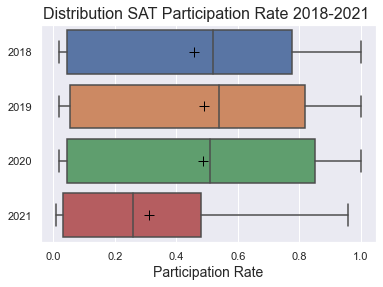

In [45]:
#making boxplot to show distribution of SAT participation and average total scores from 2018-2021
df = pd.DataFrame(data=sat_df, columns=['2018_participation', 
                                        '2019_participation', 
                                        '2020_participation', 
                                        '2021_participation']
                 )
boxplot = sns.boxplot(x = "value", y="variable",orient = "h", data=pd.melt(df),
                      showmeans=True, meanprops={"marker": "+",
                                                 "markeredgecolor": "black",
                                                 "markersize": "10"}
                     )
boxplot.axes.set_title("Distribution SAT Participation Rate 2018-2021 ", fontsize=16)
boxplot.set_xlabel("Participation Rate", fontsize=14)
boxplot.set_ylabel("", fontsize=14)
boxplot.axes.set_yticks(ticks=[0,1,2,3],labels=['2018', '2019','2020','2021'] , minor=False)
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5, style='whitegrid')
plt.show()

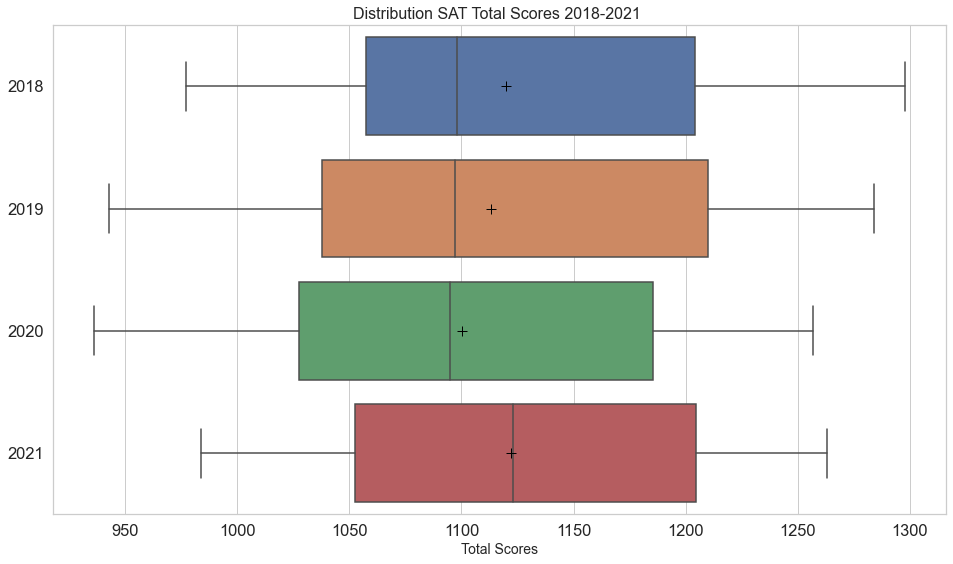

In [46]:
df = pd.DataFrame(data=sat_df, columns=['2018_total_score', 
                                        '2019_total_score', 
                                        '2020_total_score', 
                                        '2021_total_score'])
boxplot = sns.boxplot(x = "value", y="variable",orient = "h", data=pd.melt(df),
                      showmeans=True, meanprops={"marker": "+",
                                                 "markeredgecolor": "black",
                                                 "markersize": "10"}
                     )
boxplot.axes.set_title("Distribution SAT Total Scores 2018-2021 ", fontsize=16)
boxplot.set_xlabel("Total Scores", fontsize=14)
boxplot.set_ylabel("", fontsize=14)
boxplot.axes.set_yticks(ticks=[0,1,2,3],labels=['2018', '2019','2020','2021'] , minor=False)
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5, style='whitegrid')
plt.show()

#### Boxplot Observations

SAT participation rates are seen to have increased from 2018 and 2020, but faced a significant drop in 2021.
As for the total scores, 2021 faced an overall better state performance from the cohort in terms of mean and 25th-75th percentile. Lowest score was also higher than previous years. However, the highest overall total score recorded for a state was lower than in 2019 and 2018. 

In [47]:
#making function to plot mulitple scatterplot in one figure
def subplot_scatterplot(df, list_of_x, list_of_y, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,9))  
    ax = ax.ravel() 
    for i, x, y in zip(range(len(list_of_x)),list_of_x,list_of_y): 
        ax[i].scatter(df[x], df[y])
        ax[i].set_title(f'{list_of_xlabels[i]} vs {list_of_ylabels[i]}', fontsize=14)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=13)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=13)
        ax[i].grid(False)
        fig.tight_layout()

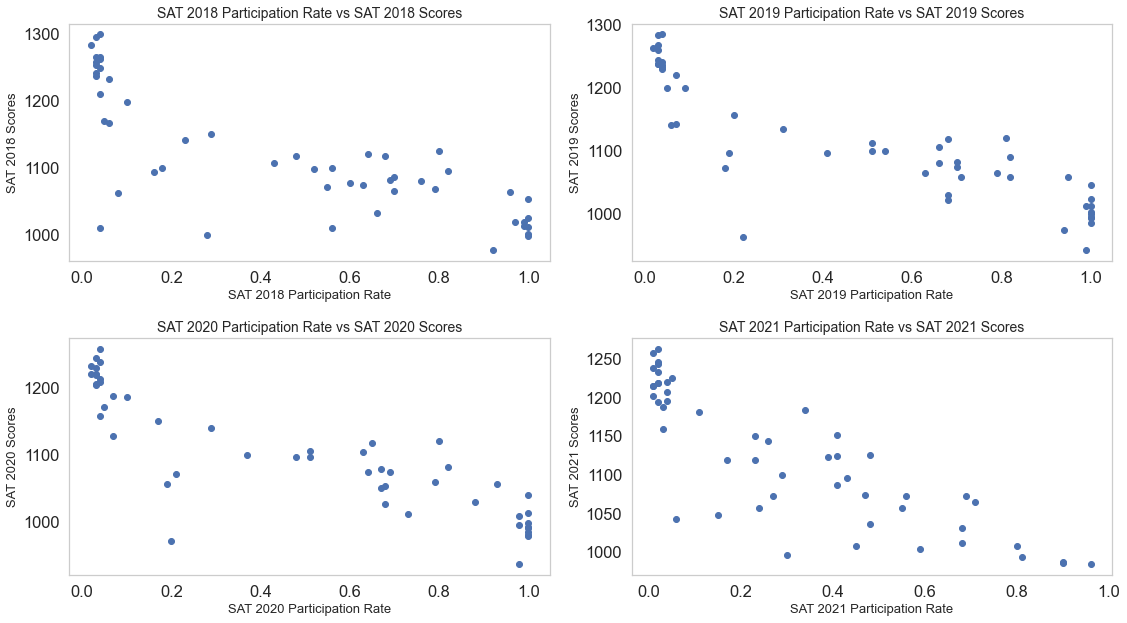

In [48]:
list_of_x_values =['2018_participation', '2019_participation', '2020_participation', '2021_participation']
list_of_y_values =['2018_total_score', '2019_total_score', '2020_total_score', '2021_total_score']
xlabels = ["SAT 2018 Participation Rate", "SAT 2019 Participation Rate", "SAT 2020 Participation Rate","SAT 2021 Participation Rate"]
ylabels = ["SAT 2018 Scores","SAT 2019 Scores","SAT 2020 Scores","SAT 2021 Scores"]

subplot_scatterplot(df=sat_df, 
                    list_of_x=list_of_x_values , 
                    list_of_y=list_of_y_values, 
                    list_of_xlabels=xlabels, 
                    list_of_ylabels=ylabels
                   )

#### Scatterplot Observations

The scatterplots reinforces the observations seen in the heatmap with SAT participation rates having a strong negative correlation to the average total scores (as participation rate increases, the average state SAT score decreases.

### Trends seen in COVID-19 on SAT Participation Rates

In [49]:
#Making 2020 and 2021 dataframe that shows participation and covid cases in each state
sat_2020_2021 = sat_df[['state', '2020_participation', '2021_participation']]
covid_sat_participation = pd.merge(total_cases, sat_2020_2021, on="state")

In [50]:
covid_sat_participation.corr()

2020_tot_cases  2021_tot_cases  2020_participation  \
2020_tot_cases            1.000000        0.964015            0.158778   
2021_tot_cases            0.964015        1.000000            0.251314   
2020_participation        0.158778        0.251314            1.000000   
2021_participation        0.134414        0.216941            0.917487   

                    2021_participation  
2020_tot_cases                0.134414  
2021_tot_cases                0.216941  
2020_participation            0.917487  
2021_participation            1.000000

From the correlation coefficients, we cannot assume a correlation of COVID-19 cases on SAT participation rates in the respective years. The dataset used here is based on state-level analysis. If we were to run through a linear regression analysis, it would mean we are trying to find if a state's COVID-19 total number of cases would affect another state's SAT participation, which logically does not make sense.

Therefore, we must use a national-level data to eliminate this problem. 
We will be using the sat_par_abs as the dataframe shows the participation of SATs in absolute numbers, rather than in percentage. Following which, the data will be filtered and made into a new dataframe to show national-level numbers.

In [51]:
# last row of dataset indicates the sum of students in for each column. This is to find the national total of students with respect to the column
total_dict = sat_par_abs.iloc[len(sat_par_abs)-1].to_dict()
total_dict={key: total_dict[key] for key in total_dict if key not in ['state_name', 'state']}

#finding participation rate of each year on a national level
participation_rate = []
year = ['2019','2020', '2021']
for y in year:
    participation_rate.append((round(total_dict[f'test_takers_{y}'] / total_dict[f'num_grads_{y}'],3)))
    
print(participation_rate)

[0.607, 0.605, 0.373]


In [52]:
total_cases.head(2)

state_name state  2020_tot_cases  2021_tot_cases
0     Alaska    AK           45771          105812
1    Alabama    AL          361998          542466

In [53]:
#find total number of COVID-19 cases in each year. 
#Since 2020 is the start of the pandemic, 2019 will be represented with a 0.
print(total_cases['2020_tot_cases'].sum())
print(total_cases['2021_tot_cases'].sum())

19605785
33439052


In [54]:
tot_cases = [0,19605785,33439052]

In [55]:
#Making a separate dataframe based on total number of cases at end of each year
details= {
    'year' : year,
    'tot_cases' : tot_cases,
    'participation_rate' : participation_rate
}

sum_covid_cases_df = pd.DataFrame(details)


In [56]:
#checking
sum_covid_cases_df.head()

year  tot_cases  participation_rate
0  2019          0               0.607
1  2020   19605785               0.605
2  2021   33439052               0.373

In [57]:
#Calculating linear regression and drawing best fit line
X = sum_covid_cases_df[["tot_cases"]]
y = sum_covid_cases_df["participation_rate"]

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

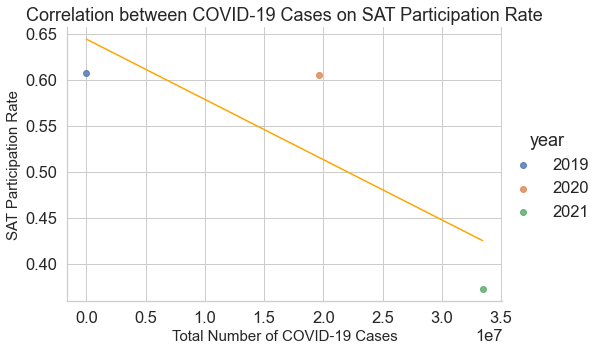

In [58]:
sns.lmplot(data=sum_covid_cases_df, x="tot_cases", y="participation_rate", hue="year",fit_reg = True, height=5, aspect=1.5)
ax = plt.gca()
ax.set_title('Correlation between COVID-19 Cases on SAT Participation Rate', fontsize=18)
ax.set_xlabel('Total Number of COVID-19 Cases', fontsize=15)
ax.set_ylabel('SAT Participation Rate', fontsize=15)
plt.plot(sum_covid_cases_df["tot_cases"], y_pred, color='orange')
plt.show()

In [59]:
sum_covid_cases_df.corr()

tot_cases  participation_rate
tot_cases            1.000000           -0.816483
participation_rate  -0.816483            1.000000

#### Correlation Observation

From here, we see a strong negative correlation (higher the number of COVID-19 cases, the lower the SAT participation rate).

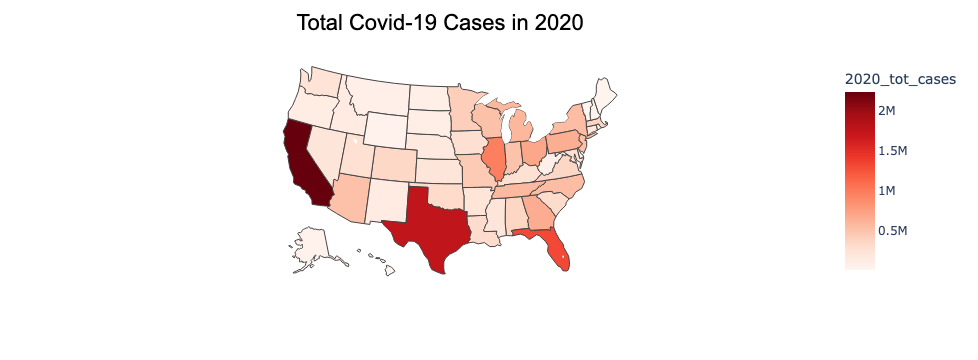

In [60]:
fig = px.choropleth(total_cases,
                    locations='state',
                    locationmode = 'USA-states', 
                    scope='usa',
                    color = '2020_tot_cases',
                    color_continuous_scale = 'reds',
                   )
fig.update_layout(
      title_text = 'Total Covid-19 Cases in 2020',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

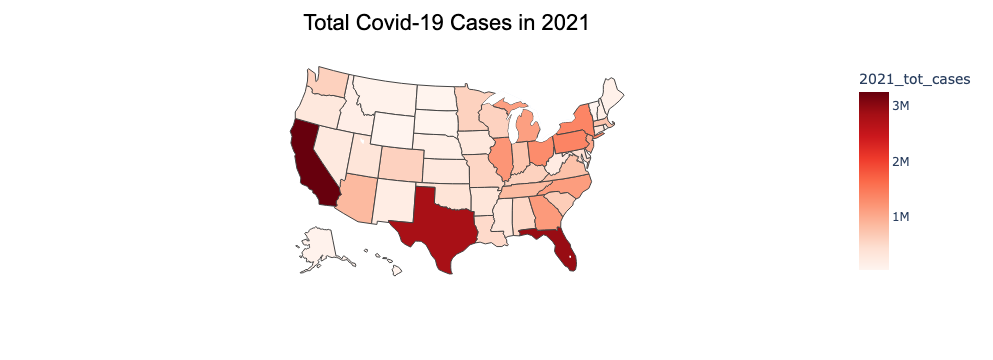

In [61]:
fig = px.choropleth(total_cases,
                    locations='state',
                    locationmode = 'USA-states', 
                    scope='usa',
                    color = '2021_tot_cases',
                    color_continuous_scale = 'reds',
                   )
fig.update_layout(
      title_text = 'Total Covid-19 Cases in 2021',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

From the maps, we can see 3 states have the most number of total COVID-19 cases in both 2020 and 2021 which are California(CA), Texas(TX), Florida(FL).

In [62]:
focused_list= ['CA','TX','FL']
focused_covid_states=sat_df.loc[sat_df['state'].isin(focused_list)]

focused_covid_states=focused_covid_states.drop(labels=['2018_ebrw','2018_math','2018_total_score','2019_ebrw','2019_math','2019_total_score',
                                                        '2020_ebrw','2020_math','2020_total_score','2021_ebrw','2021_math','2021_total_score'],
                                               axis=1)

focused_covid_states=pd.melt(focused_covid_states, id_vars=['state_name', 'state'])

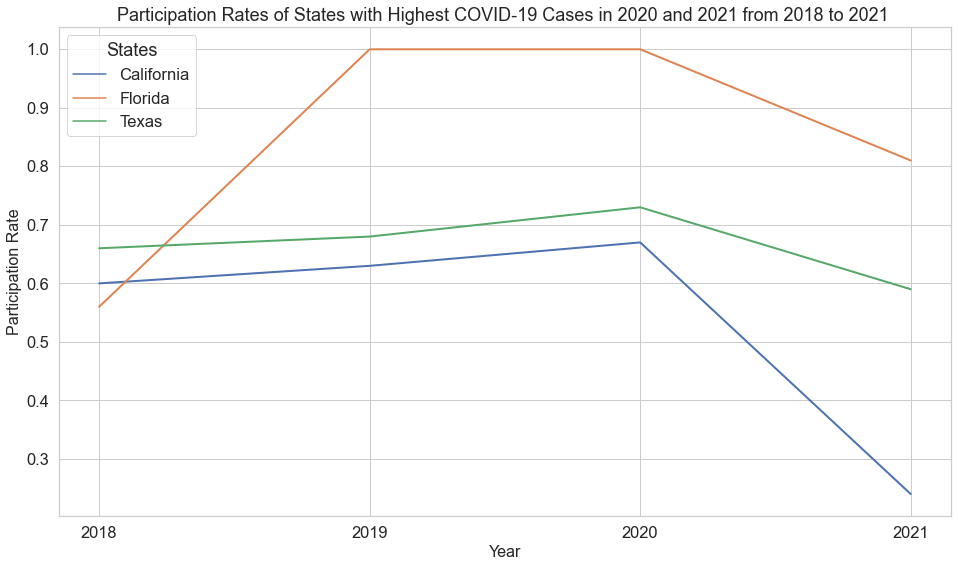

In [63]:
lineplot = sns.lineplot(x = "variable", y = "value", hue='state_name',data = focused_covid_states, lw=2)

lineplot.axes.set_title("Participation Rates of States with Highest COVID-19 Cases in 2020 and 2021 from 2018 to 2021 ", fontsize=18)
lineplot.set_xlabel("Year", fontsize=16)
lineplot.set_ylabel("Participation Rate", fontsize=16)
lineplot.axes.set_xticks(ticks=[0,1,2,3],labels=['2018', '2019','2020','2021'] , minor=False)
sns.set(rc={'figure.figsize':(16,9)}, font_scale=1.5, style='whitegrid')
plt.legend(title='States')
plt.show()

---

## Other Factor(s) That Could Affect Participation Rate

Based on the ACT/SAT college requirements data, there has been an increase in universities opting to drop SAT/ACT requirement in 2021. The dataset has been cleaned to show schools that have made standardised test as optional in 2021 ('yes'), schools that have already implemented the policy and made permanent ('permanent') and schools that have made the test compulsory ('nil') under 'optional_in_2021' column.

In [64]:
test_req_dict = test_req_df['optional_in_2021'].value_counts().to_dict()

In [65]:
test_req_dict

{'yes': 232, 'permanent': 158, 'nil': 26}

158 schools made ACT/SAT requirements optional prior to the 2021 cohort. 232 new schools emerged to allow a similar arrangement (be it temporarily only for 2021 or for a specified batch year). 

From the results, there is an increase of 232 schools from 158 (that have already made the SAT/ACT test optional in their admission policy), bringing the total to 390 schools and making about 93% of the universities not requiring SAT/ACT results.

---

## Conclusion and Recommendations

Although there is a correlation between number of COVID-19 cases and SAT Participation, with the decreased numbers seen with high COVID-19 cases, it could still not explain the drastic decrease in numbers from 2020 to 2021. Especially when studying the top 3 states that had the highest overall COVID-19 cases recorded from 2020 to 2021, it can be concluded that there may be another underlying reason.

From the data retrieved from universities requirement in SAT/ACT in their admission policies, about [93%](#Other-Factor(s)-That-Could-Affect-Participation-Rate) of the universities have made the test optional in their admission requirement. This could have contributed to the sharp decline in SAT participation in 2021, even though there was an uptick in the numbers from 2018 to 2019. Therefore, COVID-19 could be the catalyst in the decrease in participation during the peri-Covid-19 period. Furthermore, there was a higher number of COVID-19 cases recorded in 2021 which could compel students to forgo partaking in SAT/ACT test for the college/university admission, especially since most schools have made it optional as well.

Additional research shows that COVID-19 has a bigger effect on those [aged 30 and above](https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/hospitalization-death-by-age.html). The COVID numbers that we have may be skewed towards the higher age group resulting in no clear relationships observed.

Thus, we recommend future research should take into consideration the influence of other these other factors. Furthermore, this project is limited by the sample size, with only 3 years of study since COVID-19 is a relatively new phenomenon. Further research should be done in the following years in which COVID-19 is still prevalent.